## Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
excel = pd.ExcelFile('../data/online_retail_II.xlsx')
excel.sheet_names

['Year 2009-2010', 'Year 2010-2011']

In [3]:
%%time
df1 = excel.parse(sheet_name = excel.sheet_names[0])
df1.head()

CPU times: user 1min 2s, sys: 1.06 s, total: 1min 3s
Wall time: 1min 3s


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
%%time
df2 = excel.parse(sheet_name = excel.sheet_names[1])
df2.head()

CPU times: user 1min 7s, sys: 993 ms, total: 1min 8s
Wall time: 1min 8s


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df = pd.concat([df1, df2], axis = 0)
print(df.shape)
print(df.dtypes)
df.head()

(1067371, 8)
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Simple EDA

<AxesSubplot:xlabel='Country'>

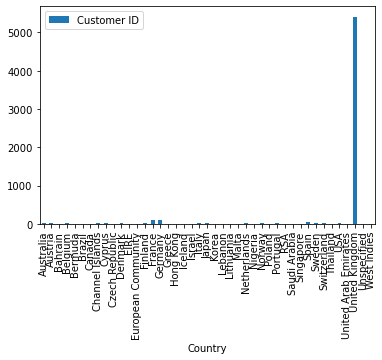

In [6]:
df.groupby('Country').nunique()[['Customer ID']].plot(kind = 'bar')

<AxesSubplot:xlabel='Country'>

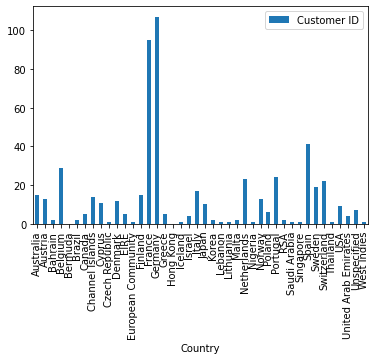

In [7]:
df[df.Country != 'United Kingdom'].groupby('Country').nunique()[['Customer ID']].plot(kind = 'bar')

In [8]:
df[df.Description.str.contains('UMBRELLA') == True].Description.unique()

array(['BLACK/BLUE DOTS RUFFLED UMBRELLA',
       'RED/WHITE DOTS RUFFLED UMBRELLA',
       'FOLDING UMBRELLA , BLACK/BLUE  SPOT',
       'FOLDING UMBRELLA  PINK/WHITE  SPOT',
       'FOLDING UMBRELLA  CREAM/MULTI  SPOT',
       'FOLDING UMBRELLA , RED/WHITE SPOT',
       'FOLDING UMBRELLA  WHITE/RED  SPOT',
       'BLUE/BROWN DOTS RUFFLED UMBRELLA',
       'PINK/BROWN DOTS RUFFLED UMBRELLA', 'RED SPOTTY CHILDS UMBRELLA',
       'PINK SPOTTY CHILDS UMBRELLA', 'STRAWBERRY DREAM CHILDS UMBRELLA',
       "DOLLY MIXTURE CHILDREN'S UMBRELLA",
       'FOLDING UMBRELLA  CHOC/WHITE  SPOT', 'FAIRY CAKE DESIGN UMBRELLA',
       'PINK FLOWERS CHILDS UMBRELLA', 'RAIN GIRL CHILDS UMBRELLA',
       'DANISH ROSE UMBRELLA STAND', 'BLACK/BLUE POLKADOT UMBRELLA',
       'FOLDING UMBRELLA BLACKBLUE POLKADOT',
       'FOLDING UMBRELLA RED/WHITE POLKADOT',
       'FOLDING UMBRELLA PINKWHITE POLKADOT', 'RED RETROSPOT UMBRELLA',
       'PINK POLKADOT CHILDRENS UMBRELLA',
       'RED RETROSPOT CHILDRENS UMBRE

In [9]:
df[df.Description.str.contains('RAIN') == True].Description.unique()

array(['RAINY LADIES BIRTHDAY CARD', 'KIDS RAIN MAC BLUE',
       'KIDS RAIN MAC PINK', 'RAIN HAT WITH RED SPOTS',
       'RAINBOW PEGS PHOTO CLIP STRING',
       'KNITTED RAINBOW HOT WATER BOTTLE', 'RAIN PONCHO ',
       'RAIN GIRL CHILDS UMBRELLA', 'PAINTED LIGHTBULB RAINBOW DESIGN',
       'RAIN PONCHO WITH RED SPOTS', 'POLKADOT RAIN HAT ',
       'RAIN PONCHO RETROSPOT', 'REGENCY TEA STRAINER',
       'PANTRY HOOK TEA STRAINER ', 'SET OF 6 EASTER RAINBOW CHICKS'],
      dtype=object)

There are way too many products and customers, so let's narrow the scope a little.
Let's do the umbrella/rain coat category for UK.

In [10]:
df = df[(df.Country.isin(['United Kingdom'])) & ((df.Description.str.contains('UMBRELLA') == True) | (df.Description.str.contains('RAIN HAT') == True) | ((df.Description.str.contains('RAIN PONCHO') == True)))].reset_index(drop = True)
df.Description.unique()

array(['FOLDING UMBRELLA , BLACK/BLUE  SPOT',
       'FOLDING UMBRELLA  PINK/WHITE  SPOT',
       'FOLDING UMBRELLA  CREAM/MULTI  SPOT',
       'FOLDING UMBRELLA , RED/WHITE SPOT',
       'FOLDING UMBRELLA  WHITE/RED  SPOT',
       'BLUE/BROWN DOTS RUFFLED UMBRELLA',
       'BLACK/BLUE DOTS RUFFLED UMBRELLA',
       'RED/WHITE DOTS RUFFLED UMBRELLA',
       'PINK/BROWN DOTS RUFFLED UMBRELLA', 'RAIN HAT WITH RED SPOTS',
       'PINK SPOTTY CHILDS UMBRELLA', 'RED SPOTTY CHILDS UMBRELLA',
       "DOLLY MIXTURE CHILDREN'S UMBRELLA",
       'FOLDING UMBRELLA  CHOC/WHITE  SPOT',
       'STRAWBERRY DREAM CHILDS UMBRELLA', 'FAIRY CAKE DESIGN UMBRELLA',
       'RAIN PONCHO ', 'PINK FLOWERS CHILDS UMBRELLA',
       'RAIN GIRL CHILDS UMBRELLA', 'DANISH ROSE UMBRELLA STAND',
       'RAIN PONCHO WITH RED SPOTS', 'BLACK/BLUE POLKADOT UMBRELLA',
       'FOLDING UMBRELLA BLACKBLUE POLKADOT',
       'FOLDING UMBRELLA RED/WHITE POLKADOT', 'POLKADOT RAIN HAT ',
       'FOLDING UMBRELLA PINKWHITE POLKADOT

In [11]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489465,21707,"FOLDING UMBRELLA , BLACK/BLUE SPOT",12,2009-12-01 10:52:00,4.95,13767.0,United Kingdom
1,489465,21710,FOLDING UMBRELLA PINK/WHITE SPOT,12,2009-12-01 10:52:00,4.95,13767.0,United Kingdom
2,489465,21708,FOLDING UMBRELLA CREAM/MULTI SPOT,12,2009-12-01 10:52:00,4.95,13767.0,United Kingdom
3,489465,21706,"FOLDING UMBRELLA , RED/WHITE SPOT",12,2009-12-01 10:52:00,4.95,13767.0,United Kingdom
4,489465,21711,FOLDING UMBRELLA WHITE/RED SPOT,12,2009-12-01 10:52:00,4.95,13767.0,United Kingdom


## Do some naive feature engineering

We are going for the following features:
- Folding
- Dots
- Poncho
- Hat
- Price
- Order Year
- Order Month
- Child Item
- Ruffled

In [12]:
feats = df.copy()
feats.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [13]:
feats['umbrella'] = feats.Description.apply(lambda x: 1 if x.upper().find('UMBRELLA') > -1 else 0)
feats['folding'] = feats.Description.apply(lambda x: 1 if x.upper().find('FOLDING') > -1 else 0)
feats['poncho'] = feats.Description.apply(lambda x: 1 if x.upper().find('PONCHO') > -1 else 0)
feats['hat'] = feats.Description.apply(lambda x: 1 if x.upper().find('HAT') > -1 else 0)
feats['dots'] = feats.Description.apply(lambda x: 1 if x.upper().find('DOT') + x.upper().find('SPOT') > -2 else 0)
feats['kids'] = feats.Description.apply(lambda x: 1 if x.upper().find('CHILD') + x.upper().find('GIRL') + x.upper().find('BOY') + x.upper().find('KID') > -4 else 0)
feats['ruffled'] = feats.Description.apply(lambda x: 1 if x.upper().find('RUFFLED') > -1 else 0)
feats.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,umbrella,folding,poncho,hat,dots,kids,ruffled
0,489465,21707,"FOLDING UMBRELLA , BLACK/BLUE SPOT",12,2009-12-01 10:52:00,4.95,13767.0,United Kingdom,1,1,0,0,1,0,0
1,489465,21710,FOLDING UMBRELLA PINK/WHITE SPOT,12,2009-12-01 10:52:00,4.95,13767.0,United Kingdom,1,1,0,0,1,0,0
2,489465,21708,FOLDING UMBRELLA CREAM/MULTI SPOT,12,2009-12-01 10:52:00,4.95,13767.0,United Kingdom,1,1,0,0,1,0,0
3,489465,21706,"FOLDING UMBRELLA , RED/WHITE SPOT",12,2009-12-01 10:52:00,4.95,13767.0,United Kingdom,1,1,0,0,1,0,0
4,489465,21711,FOLDING UMBRELLA WHITE/RED SPOT,12,2009-12-01 10:52:00,4.95,13767.0,United Kingdom,1,1,0,0,1,0,0


In [14]:
feats['order_year'] = feats.InvoiceDate.dt.year
feats['order_month'] = feats.InvoiceDate.dt.month
feats.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,umbrella,folding,poncho,hat,dots,kids,ruffled,order_year,order_month
0,489465,21707,"FOLDING UMBRELLA , BLACK/BLUE SPOT",12,2009-12-01 10:52:00,4.95,13767.0,United Kingdom,1,1,0,0,1,0,0,2009,12
1,489465,21710,FOLDING UMBRELLA PINK/WHITE SPOT,12,2009-12-01 10:52:00,4.95,13767.0,United Kingdom,1,1,0,0,1,0,0,2009,12
2,489465,21708,FOLDING UMBRELLA CREAM/MULTI SPOT,12,2009-12-01 10:52:00,4.95,13767.0,United Kingdom,1,1,0,0,1,0,0,2009,12
3,489465,21706,"FOLDING UMBRELLA , RED/WHITE SPOT",12,2009-12-01 10:52:00,4.95,13767.0,United Kingdom,1,1,0,0,1,0,0,2009,12
4,489465,21711,FOLDING UMBRELLA WHITE/RED SPOT,12,2009-12-01 10:52:00,4.95,13767.0,United Kingdom,1,1,0,0,1,0,0,2009,12


In [15]:
feats.drop(columns = ['Invoice', 'InvoiceDate','Description', 'Country', 'Customer ID', 'StockCode'], inplace = True)
feats.head()

,Quantity,Price,umbrella,folding,poncho,hat,dots,kids,ruffled,order_year,order_month
0,12,4.95,1,1,0,0,1,0,0,2009,12
1,12,4.95,1,1,0,0,1,0,0,2009,12
2,12,4.95,1,1,0,0,1,0,0,2009,12
3,12,4.95,1,1,0,0,1,0,0,2009,12
4,12,4.95,1,1,0,0,1,0,0,2009,12


In [16]:
feats['order_month_sin'] = np.sin((feats.order_month-1)*(2.*np.pi/12))
feats['order_month_cos'] = np.cos((feats.order_month-1)*(2.*np.pi/12))
feats['order_year'] = feats['order_year'] - 2000
feats.drop(columns = ['order_month', 'order_year'], inplace = True) # will exclude year just in this case
feats.head()

,Quantity,Price,umbrella,folding,poncho,hat,dots,kids,ruffled,order_month_sin,order_month_cos
0,12,4.95,1,1,0,0,1,0,0,-0.5,0.866025
1,12,4.95,1,1,0,0,1,0,0,-0.5,0.866025
2,12,4.95,1,1,0,0,1,0,0,-0.5,0.866025
3,12,4.95,1,1,0,0,1,0,0,-0.5,0.866025
4,12,4.95,1,1,0,0,1,0,0,-0.5,0.866025


In [17]:
feats.order_month_sin.unique()

array([-5.00000000e-01,  0.00000000e+00,  5.00000000e-01,  8.66025404e-01,
        1.00000000e+00,  8.66025404e-01,  5.00000000e-01,  1.22464680e-16,
       -5.00000000e-01, -8.66025404e-01, -1.00000000e+00, -8.66025404e-01])

In [18]:
feats.order_month_cos.unique()

array([ 8.66025404e-01,  1.00000000e+00,  8.66025404e-01,  5.00000000e-01,
        6.12323400e-17, -5.00000000e-01, -8.66025404e-01, -1.00000000e+00,
       -8.66025404e-01, -5.00000000e-01, -1.83697020e-16,  5.00000000e-01])

<AxesSubplot:>

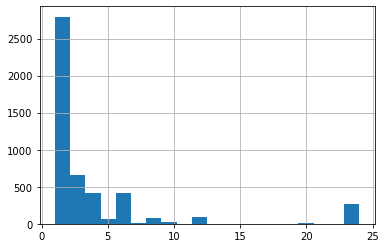

In [20]:
#remove return orders and troll batch orders
feats = feats[(feats.Quantity > 0) & (feats.Quantity <= 25)]
feats.Quantity.hist(bins = 'doane')

## Fit a Linear Regression for Quantities Ordered

In [21]:
feats.dtypes

Quantity             int64
Price              float64
umbrella             int64
folding              int64
poncho               int64
hat                  int64
dots                 int64
kids                 int64
ruffled              int64
order_month_sin    float64
order_month_cos    float64
dtype: object

In [22]:
y = feats.Quantity
X = feats.drop(columns = ['Quantity'])

In [30]:
import statsmodels.api as sm
model = sm.GLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       0.172
Model:                            GLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     111.5
Date:                Sat, 07 Aug 2021   Prob (F-statistic):          1.19e-190
Time:                        16:09:46   Log-Likelihood:                -14610.
No. Observations:                4844   AIC:                         2.924e+04
Df Residuals:                    4834   BIC:                         2.931e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Price              -0.4168      0.033    -12.623      0.000      -0.482      -0.352
umbrella            5.1864      0.291     17.845      0.000       4.617       5.756
folding            -0.2418      0.247     -0.978      0.328      -0.727       0.243
poncho              8.9654      0.276     32.495      0.000       8.425       9.506
hat                 6.7126      0.311     21.599      0.000       6.103       7.322
dots                0.5162      0.203      2.537      0.011       0.117       0.915
kids               -1.0041      0.228     -4.398      0.000      -1.452      -0.556
ruffled             0.0879      0.242      0.364      0.716      -0.386       0.562
order_month_sin     0.0550      0.107      0.513      0.608      -0.155       0.265
order_month_cos     0.0893      0.103      0.865      0.387      -0.113       0.292
==============================================================================
Omnibus:                     1931.067   Durbin-Watson:                   1.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7835.828
Skew:                           1.967   Prob(JB):                         0.00
Kurtosis:                       7.832   Cond. No.                         33.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
def sin_trans(x):
    return np.sin((x-1)*(2.*np.pi/12))

def cos_trans(x):
    return np.cos((x-1)*(2.*np.pi/12))

In [42]:
# see if the thing can predict
X_hat = pd.DataFrame({'Price': 4.55, 'umbrella': 1, 'folding': 1, 'poncho': 0, 'hat': 0, 'dots': 0, 'kids': 0, 'ruffled': 0, 'order_month_sin': sin_trans(7),'order_month_cos': cos_trans(7)}, index = [0])

results.predict(X_hat).iloc[0].round()

3.0

## Export the model

In [44]:
import pickle
with open('../models/OLS.pkl', 'wb') as f:
    pickle.dump(results, f)